In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns 


%matplotlib inline


In [2]:
data = pd.read_csv('housing.data2.txt', header=None, sep='\s+')
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(data.head(5))


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
data.isnull().sum()  #check if there are missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

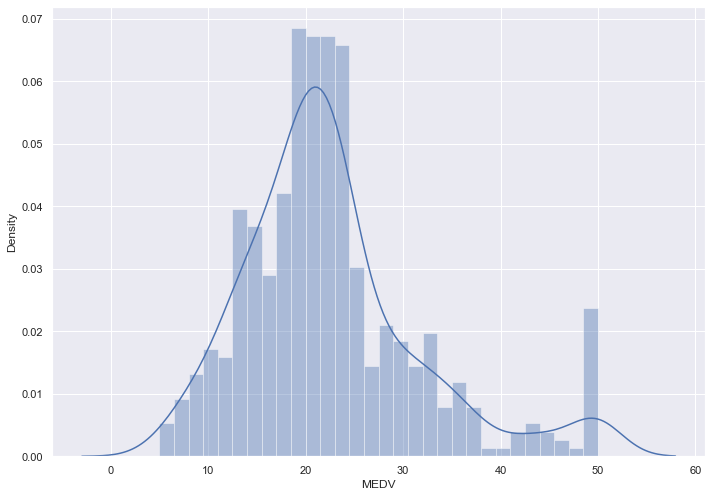

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

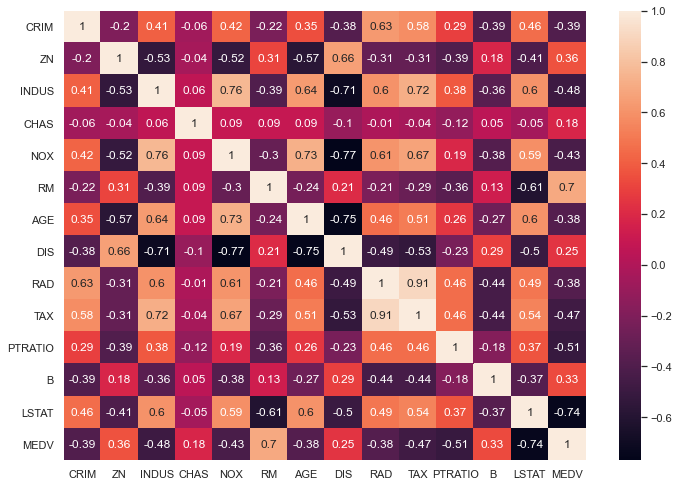

In [5]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

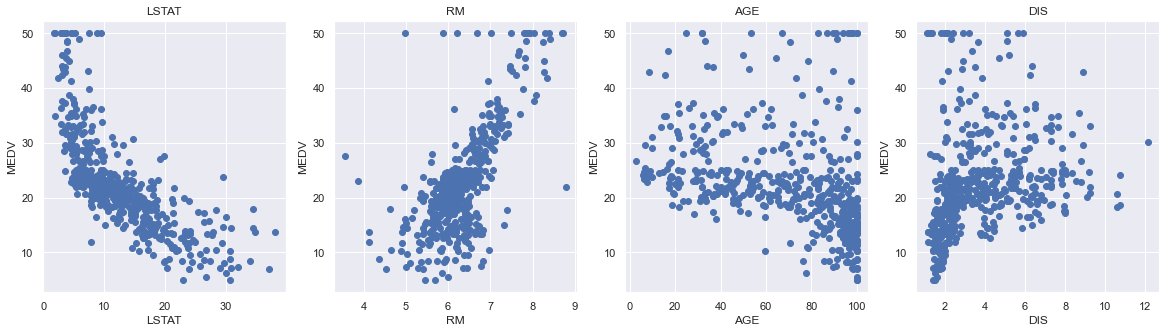

In [16]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'AGE', 'DIS']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [17]:
#since medv is our target variable we have to 
#find one that have high correlation with it and so RM has a high positive and lsat has a high negative

X = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['AGE'], data['DIS']], columns = ['LSTAT','RM', 'PTRATIO', 'ZN'])
Y =data['MEDV']

In [26]:
#split data into training and testing sets
#trained model with 70 percent of samples and test with 30%
#used to access the modles performance on unseen data
#testin more due to more parameters
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [28]:
#prediction model for testing set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

#prediction model for training set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))


#the training set and the testing set are both alright. They are neith overfitting nor underfitting
#compared to the simple linear regression they are similar to each other. 

The model performance for training set
--------------------------------------
RMSE is 5.556669443406329


The model performance for testing set
--------------------------------------
RMSE is 5.0606147851080925


In [29]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_train, y_train_predict)

print('R2 score is {}'.format(r2))
print("\n")

r2 = r2_score(Y_test, y_test_predict)
print('R2 score is {}'.format(r2))

#the r2 score for both of them are alright. there could be some improvements but no overfitting or underfitting is there.
#compared to the simple linear regression they are similar to each other, 

R2 score is 0.6405591952427563


R2 score is 0.672901308530772
